Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [1]:
import pandas as pd
import numpy as np
flight_df=pd.read_csv('C:/Users/Admin/Documents/Python_Program/datasets/flight/economy.csv')
flight_df['stop'] = flight_df['stop'].str.replace(r'[\t\n]', '', regex=True)

In [2]:
print('No. of rows: ',flight_df.shape[0])
print('No. of columns: ',flight_df.shape[1])

No. of rows:  206774
No. of columns:  11


Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

In [3]:
#remove comma from price feature and convert into integer
flight_df.price=flight_df.price.str.replace(',','').astype(int)

In [4]:
# Calculate the minimum and maximum prices
min_price = flight_df.price.min()
max_price = flight_df.price.max()
num_bins=20

# Calculate the bin width
bin_width = (max_price - min_price) / num_bins

# Calculate the bin boundaries
bin_boundaries = np.arange(min_price, max_price + bin_width, bin_width)

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(flight_df.price, bins=bin_boundaries, edgecolor='black')

mean_price = flight_df.price.mean()
plt.axvline(mean_price, color='red', linestyle='--', label='Mean Price')

plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.legend()
plt.show()

<Figure size 800x600 with 1 Axes>

# conclusion

The distribution of flight prices in the dataset follows a logarithmic distribution. 

The logarithmic distribution suggests that the majority of flight prices in the dataset are concentrated towards the lower end, with relatively fewer flights having higher prices.

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [6]:
print('maximum price:',max_price)
print('minimum price:',min_price)

maximum price: 42349
minimum price: 1105


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

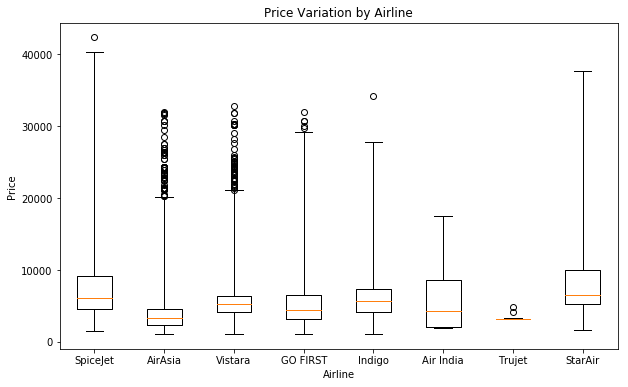

In [7]:
import matplotlib.pyplot as plt

# Group the flight data by airline and extract the price data
grouped_data = flight_df.groupby('airline')['price'].apply(list)

# Create a boxplot to compare the prices of different airlines
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, labels=flight_df['airline'].unique(),whis=7)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Variation by Airline')
plt.show()


Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

Outliers in the price of flights can have several impacts:

1. Pricing Analysis: Outliers can significantly affect the analysis of flight prices. They can distort the overall price range, making it difficult to understand the typical pricing patterns. Outliers may indicate unusual circumstances or pricing anomalies that require further investigation.

2. Customer Perception: Outliers in flight prices can impact customer perception and expectations. Extremely high-priced outliers may give the impression that the airline's prices are generally expensive, potentially discouraging price-sensitive customers. On the other hand, extremely low-priced outliers may raise questions about the quality or reliability of the airline.

3. Revenue Management: Outliers can affect revenue management strategies. Airlines use sophisticated pricing models to optimize revenue based on demand and capacity. Outliers may disrupt these models and require adjustments to pricing strategies or fare rules.

4. Competitive Analysis: Outliers can influence competitive analysis within the airline industry. If one airline consistently offers significantly lower or higher prices compared to its competitors, it may indicate a unique pricing strategy or market positioning. Analyzing outliers can provide insights into competitive dynamics and pricing strategies.

5. Data Integrity: Outliers in flight prices may also indicate data integrity issues. It's important to investigate whether outliers are genuine price variations or if they result from data entry errors or system glitches. Identifying and addressing data quality issues is crucial for accurate analysis and decision-making.

Overall, outliers in flight prices can impact pricing analysis, customer perception, revenue management, competitive analysis, and data integrity. It is important to carefully analyze outliers, understand their underlying causes, and consider their implications in order to make informed decisions in the airline industry.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

In [8]:
g=flight_df.groupby('date').count()

g.sort_values(by='price',ascending=False,inplace=True,axis=0)

d=str(g.iloc[0].name).split(' ')[0]

print(f'On {d} have maximum booking {g.price[0]}')

On 07-03-2022 have maximum booking 4571


Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

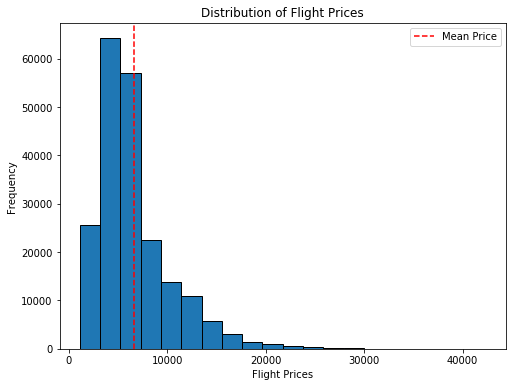

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(flight_df.price, bins=bin_boundaries, edgecolor='black')

mean_price = flight_df.price.mean()
plt.axvline(mean_price, color='red', linestyle='--', label='Mean Price')

plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.legend()
plt.show()

In [10]:
less10=flight_df.price[flight_df.price<=10000]
greater10=flight_df.price[flight_df.price>10000]

print('price of flights is less than 10000 rs is :',len(less10),'which is',(len(less10)*100)/len(flight_df),'%')
print('price of flights is greater than 10000 rs is :',len(greater10),'which is',(len(greater10)*100)/len(flight_df),'%')

price of flights is less than 10000 rs is : 173759 which is 84.03329238685714 %
price of flights is greater than 10000 rs is : 33015 which is 15.966707613142852 %


# conclusion

Price of flights is less than 10000 is booked 84%

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In [11]:
# In stop feature, perform feature engineering to cleanup 
# after cleanup then perform label encoding
flight_df.stop=flight_df.stop.str.split('-').str[0]

flight_df['stop'] = flight_df['stop'].str.replace('+', '')

flight_df.stop[flight_df.stop=='non']=0

flight_df.stop=flight_df.stop.astype(int)


C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [12]:
from sklearn.preprocessing import LabelEncoder
# perform label encoding
encoder=LabelEncoder()
flight_df.airline=encoder.fit_transform(flight_df.airline)

encoder=LabelEncoder()
flight_df.ch_code=encoder.fit_transform(flight_df.ch_code)

encoder=LabelEncoder()
flight_df['from']=encoder.fit_transform(flight_df['from'])

encoder=LabelEncoder()
flight_df.to=encoder.fit_transform(flight_df.to)

In [13]:
flight_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,4,6,8709,18:55,2,02h 10m,0,21:05,5,5953
1,11-02-2022,4,6,8157,06:20,2,02h 20m,0,08:40,5,5953
2,11-02-2022,1,4,764,04:25,2,02h 10m,0,06:35,5,5956
3,11-02-2022,7,7,995,10:20,2,02h 15m,0,12:35,5,5955
4,11-02-2022,7,7,963,08:50,2,02h 20m,0,11:10,5,5955


In [14]:
# time taken feature have eg:02h 05m like data 
# remove h,m 
flight_df['time_taken'] = flight_df['time_taken'].str.replace(r'[hm]', '', regex=True)
#seperate hour and minute
hour=flight_df.time_taken.str.split(' ').str[0]
minute=flight_df.time_taken.str.split(' ').str[1]

#replace blank with zero in mintune
minute = minute.replace('', '0').astype(int)

In [15]:
# convert hour and minute data in float because it is string format
hour = hour.astype(float) 
minute = minute.astype(int)

In [16]:
# time_taken feature have eg: 02h 05m like data, so convert into minute (eg:1410 in minute )
flight_df.time_taken=hour*60+minute

In [17]:
flight_df.corr()

,airline,ch_code,num_code,from,time_taken,stop,to,price
airline,1.000000,0.820233,-0.125375,-0.031330,0.002459,0.032573,-0.035156,0.151002
ch_code,0.820233,1.000000,-0.256195,-0.022280,0.210763,0.127950,-0.030015,0.186705
num_code,-0.125375,-0.256195,1.000000,-0.012751,-0.124885,-0.070021,0.015425,-0.090911
from,-0.031330,-0.022280,-0.012751,1.000000,0.019183,0.002441,-0.218474,0.015538
time_taken,0.002459,0.210763,-0.124885,0.019183,1.000000,0.475822,0.011620,0.288624
stop,0.032573,0.127950,-0.070021,0.002441,0.475822,1.000000,-0.017792,0.306352
to,-0.035156,-0.030015,0.015425,-0.218474,0.011620,-0.017792,1.000000,0.013068
price,0.151002,0.186705,-0.090911,0.015538,0.288624,0.306352,0.013068,1.000000


# conclusion

As correlation table clearly shown that time_taken and stop feature have postive 

time_taken: Explore the relationship between the duration of the flight and prices. The correlation coefficient of 0.288624 suggests a positive correlation, indicating that longer flight durations might be associated with higher prices.

Stops: Investigate the impact of the number of stops on flight prices. The correlation coefficient of 0.306352 indicates a mo

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [140]:
g_store=pd.read_csv('C:/Users/Admin/Documents/Python_Program/datasets/googlestore/googleplaystore.csv')

In [141]:
g_store.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [184]:
g_store.Rating=g_store.Rating.round()
g_store.Rating=g_store.Rating.astype(int)

In [142]:
print('no. of rows:',g_store.shape[0])
print('no. of columns:',g_store.shape[1])

no. of rows: 9660
no. of columns: 13


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.


<Figure size 1440x1080 with 0 Axes>

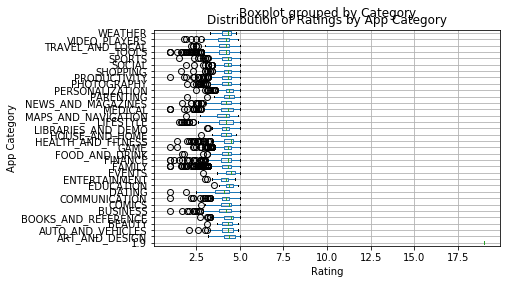

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
g_store.boxplot(column='Rating', by='Category', vert=False)

plt.xlabel('Rating')
plt.ylabel('App Category')
plt.title('Distribution of Ratings by App Category')

plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [144]:
g_store.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

The presence of missing values in the Google Play Store dataset can impact your analysis in the following ways:

    Incomplete analysis: Missing values in crucial columns, such as 'Rating', 'Type', 'Content Rating', 'Current Ver', and 'Android Ver', can limit the completeness of your analysis. For example, if you're analyzing the relationship between ratings and other features, the missing 'Rating' values can lead to incomplete insights and potentially biased conclusions.

    Biased results: Depending on the pattern of missing values, there could be potential bias in your analysis. For instance, if the missing 'Rating' values are more prevalent in specific categories or time periods, it could skew the overall distribution and impact any analysis related to ratings by category or over time.

    Statistical analysis: Missing values can affect statistical calculations and metrics. For example, if you calculate the average rating or perform correlation analysis, the presence of missing values may reduce the sample size and introduce bias in the results.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [145]:
g_store.dropna(inplace=True)

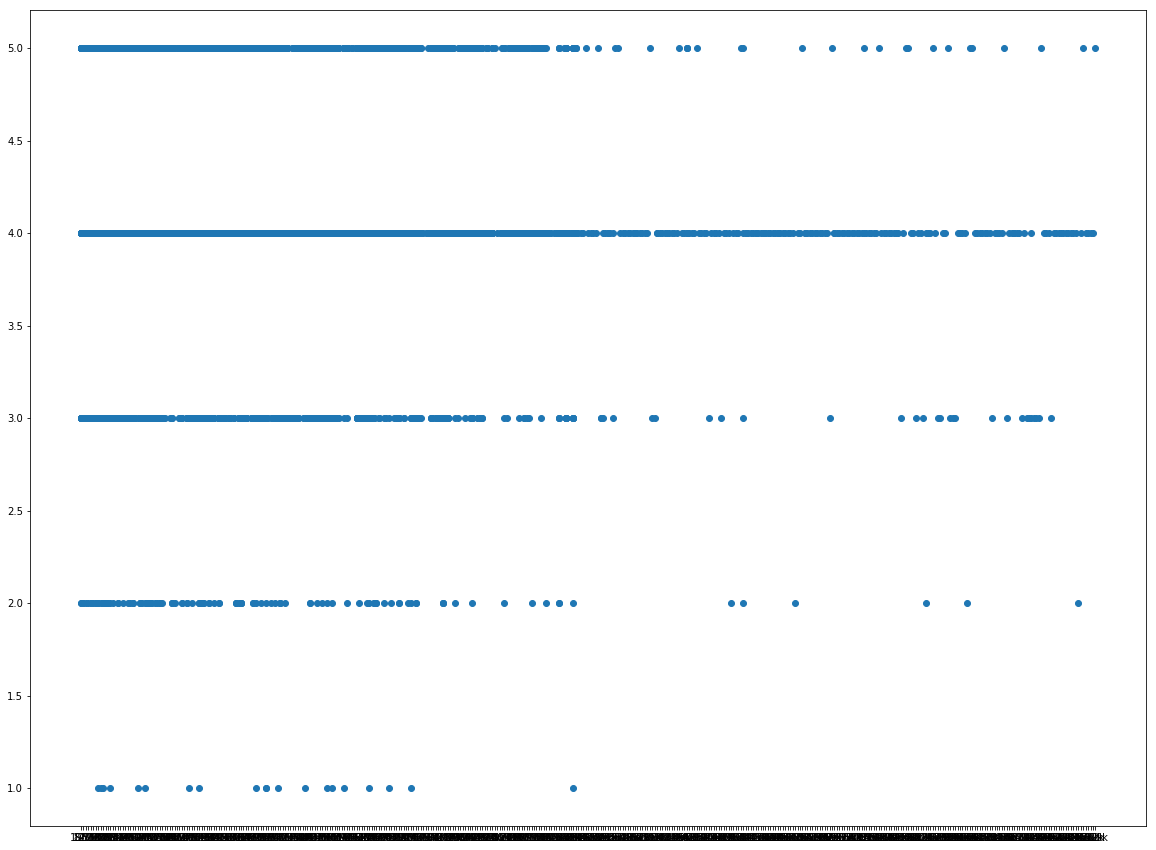

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plt.scatter(data=g_store,x='Size',y=g_store.Rating.round())
plt.show()

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [147]:
g_store.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [148]:
g_store.Price=g_store.Price.str.replace('$','')
g_store.Price=g_store.Price.astype(float)

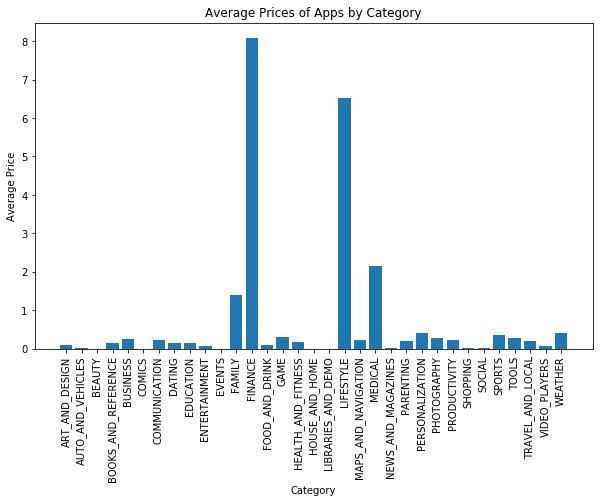

In [149]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Category' and calculate the mean price for each category
average_prices = g_store.groupby('Category')['Price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_prices.index, average_prices)

plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Prices of Apps by Category')
plt.xticks(rotation=90)

plt.show()


Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [150]:
g_store.Installs=g_store.Installs.str.replace(pat=r'[+,]',repl='',regex=True)

In [151]:
g_store.Installs=pd.to_numeric(g_store['Installs'],errors='coerce')

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

In [219]:
# get all 5 rating data in rate
rate=(g_store[g_store.Rating==5])

In [220]:
# sort rate by Install
rate_install=rate.sort_values(by='Installs',ascending=False)

In [215]:
# get in r top 10 , 5 rating app with max intall
r=rate_install[:10]

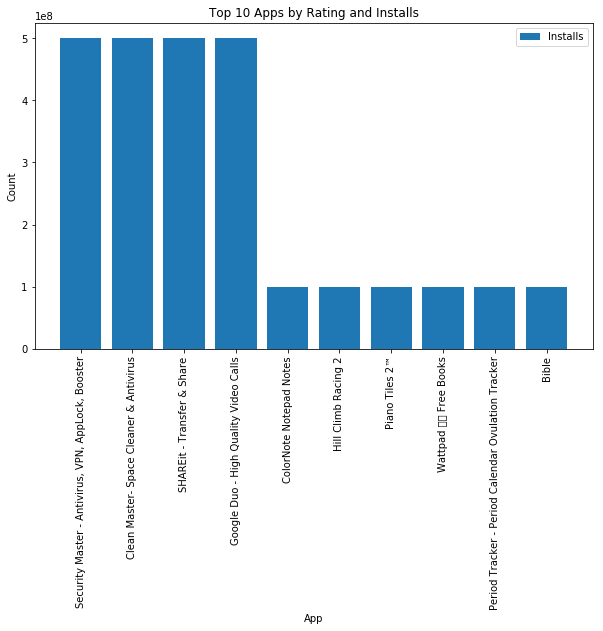

In [221]:
# Create the bar chart
plt.figure(figsize=(10, 6))

plt.bar(r['App'], r['Installs'], label='Installs')

# Customize the plot
plt.xlabel('App')
plt.ylabel('Count')
plt.title('Top 10 Apps by Rating and Installs')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.show()
